In [1]:
#q1

In [3]:
# The Formula for Eqn of Line in Linear Kernel is W(Tranpose)X + b
# Cost function is= Max(/||W||) (Hard)
# Cost function is= Min(||W||/2)+ C*Summation for i from 1 till n (Ei) (Soft)

In [4]:
#q2

In [6]:
# The objective of the SVM algorithm is to find a hyperplane that, to the best degree possible, separates 
# data points of one class from those of another class. “Best” is defined as the hyperplane with the largest 
# margin between the two classes, represented by plus versus minus in the figure below.
# Cost function is= Max(/||W||) (Hard)
# Cost function is= Min(||W||/2)+ C*Summation for i from 1 till n (Ei) (Soft)

In [7]:
#q3

In [8]:
# SVM has a technique called the kernel trick. These are functions that take low dimensional input space and 
# transform it into a higher-dimensional space i.e. it converts not separable problem to separable problem

In [10]:
#q4

In [12]:
# Support vectors are data points that are closer to the hyperplane and influence the position and orientation
# of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the 
# support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

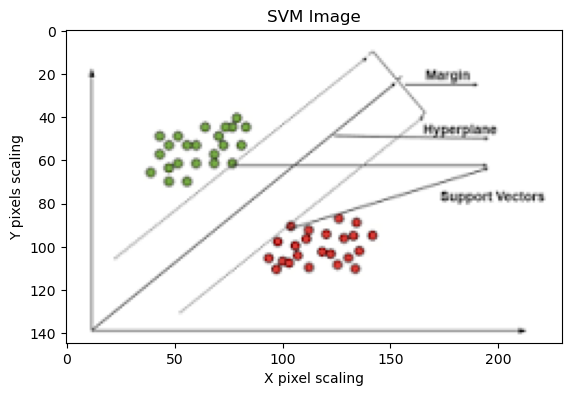

In [13]:
#Example
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

plt.title("SVM Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

image = mpimg.imread("images.png")
plt.imshow(image)
plt.show()

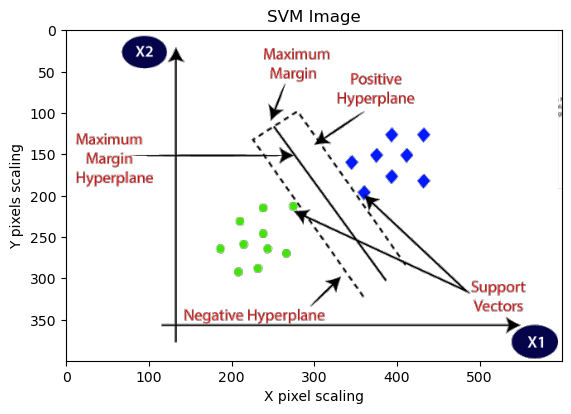

In [21]:
plt.title("SVM Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

image = mpimg.imread("support-vector-machine-algorithm.png")
plt.imshow(image)
plt.show()

In [20]:
#q6
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.datasets import load_iris

In [22]:
dataset=load_iris()

In [23]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [26]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [27]:
df['target']=dataset.target

In [33]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [37]:
df['target'].unique()

array([0, 1, 2])

In [28]:
df_copy=df[df['target']!=2]

In [48]:
df_copy.shape

(100, 5)

In [29]:
X=df_copy.iloc[:,:-1]

In [42]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y=df_copy['target']

In [44]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=10)

In [32]:
from sklearn.svm import SVC

In [33]:
svc=SVC(kernel='linear')

In [34]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [97]:
y_pred=svc.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [37]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[9 0]
 [0 6]]
1.0


In [98]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [100]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [101]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [102]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [103]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[9 0]
 [0 6]]
1.0
